La primera imagen muestra cuatro muestras tomadas de la distribución a priori.

La segunda imagen muestra la distribución a posteriori, después de observar dos puntos. La predicción media se muestra como la línea de color negro y cuatro muestras cualesquiera de la posteriori
se muestran como líneas azules. En ambos gráficos, la región sombreada
denota el doble de la desviación estándar en cada valor de entrada x

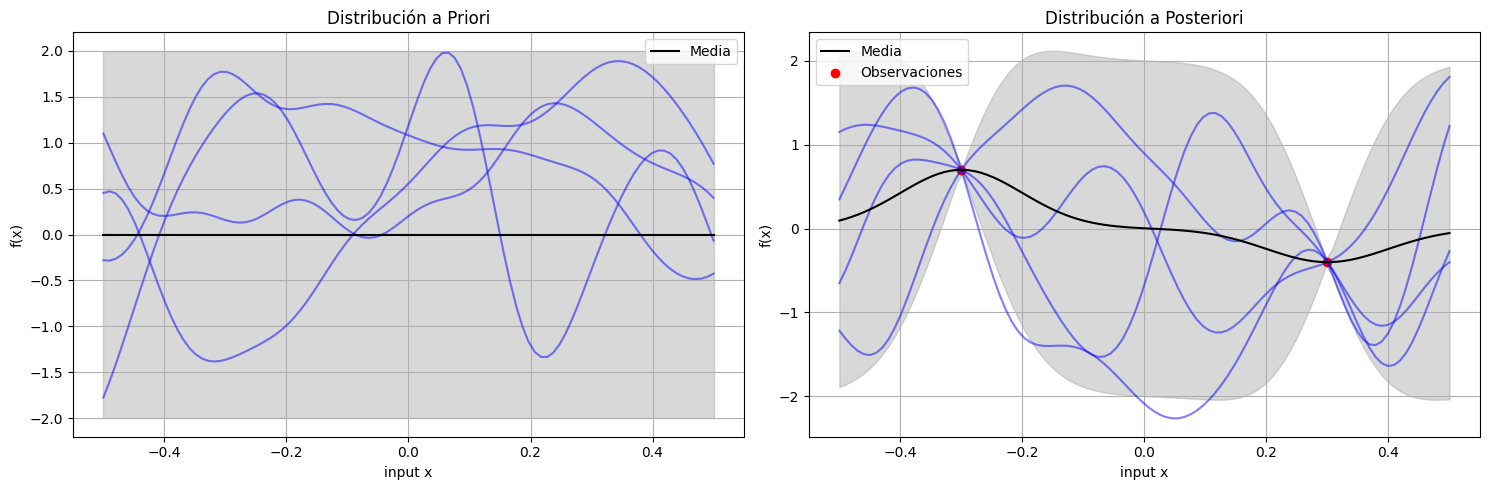

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process.kernels import RBF

# Definir los valores de x
x = np.linspace(-0.5, 0.5, 100).reshape(-1, 1)

# Definir el kernel RBF para la covarianza de la distribución a priori
kernel = 1.0 * RBF(length_scale=0.1)
prior_cov = kernel(x)

# Definir la media de la distribución a priori (se asume media cero)
prior_mean = np.zeros_like(x)

# Muestras de la distribución a priori
prior_samples = np.random.multivariate_normal(prior_mean.ravel(), prior_cov, size=4)

# Calcular la desviación estándar para el intervalo de confianza
std_dev = np.sqrt(np.diag(prior_cov))

# Crear subgráficos
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Graficar la distribución a priori en el primer subgráfico
for sample in prior_samples:
    axes[0].plot(x, sample, linestyle='-', alpha=0.5, color='blue')
axes[0].fill_between(x.ravel(), -2 * std_dev, 2 * std_dev, color='gray', alpha=0.3)
axes[0].plot(x, prior_mean, linestyle='-', color='black', label='Media')
axes[0].set_xlabel('input x')
axes[0].set_ylabel('f(x)')
axes[0].set_title('Distribución a Priori')
axes[0].legend()
axes[0].grid(True)

# Definir los puntos de datos observados
observed_points_x = np.array([-0.3, 0.3]).reshape(-1, 1)
observed_points_y = np.array([0.7, -0.4]).reshape(-1, 1)  # Valores de las observaciones

# Calcular la distribución a posteriori
K_2_2 = kernel(observed_points_x)
K_2_2_inv = np.linalg.inv(K_2_2)
K_100_2 = kernel(x, observed_points_x)
K_2_100 = kernel(observed_points_x, x)
K_100_100 = kernel(x)

posterior_mean = np.dot(np.dot(K_100_2, K_2_2_inv), observed_points_y)
posterior_cov = K_100_100 - np.dot(np.dot(K_100_2, K_2_2_inv), K_2_100)

std_dev_post = np.sqrt(np.diag(posterior_cov))

# Generar muestras de la distribución a posteriori
posterior_samples = np.random.multivariate_normal(posterior_mean.ravel(), posterior_cov, size=4)

# Graficar las muestras de la distribución a posteriori en el segundo subgráfico
for sample in posterior_samples:
    axes[1].plot(x, sample, linestyle='-', alpha=0.5, color='blue')
axes[1].plot(x, posterior_mean, linestyle='-', color='black', label='Media')
axes[1].fill_between(x.ravel(), posterior_mean.ravel() - 2 * std_dev_post, posterior_mean.ravel() + 2 * std_dev_post, color='gray', alpha=0.3)
axes[1].scatter(observed_points_x, observed_points_y, color='red', label='Observaciones')
axes[1].set_xlabel('input x')
axes[1].set_ylabel('f(x)')
axes[1].set_title('Distribución a Posteriori')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()
